In [1]:
from __future__ import print_function
from tensorflow.examples.tutorials.mnist import input_data   # Import MNIST data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define the neural network
def neural_net(x_dict):
    # TF Estimator input is a dict, in case of multiple inputs
    x = x_dict['images']
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.layers.dense(x, n_hidden_1)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.layers.dense(layer_2, num_classes)
    return out_layer

In [3]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    
    # Build the neural network
    logits = neural_net(features)
    
    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs

In [4]:
# Evaluate the Model
def evaluate_model(x, y):
    # Define the input function for evaluating
    input_fn = tf.estimator.inputs.numpy_input_fn(x={'images': x}, y=y, batch_size=batch_size, shuffle=False)
    
    # Use the Estimator 'evaluate' method
    model.evaluate(input_fn)

In [5]:
# Predict single images
def predict_single_images(images):
    n_images = 5
    images = images[:n_images]

    # Prepare the input data
    input_fn = tf.estimator.inputs.numpy_input_fn(x={'images': images}, shuffle=False)

    # Use the model to predict the images class
    preds = list(model.predict(input_fn))

    # Display
    for i in range(n_images):
        plt.imshow(np.reshape(images[i], [28, 28]), cmap='gray')
        plt.show()
        print("Model prediction:", preds[i])

In [6]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [7]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels
y_test = mnist.test.labels

In [8]:
# Parameters
learning_rate = 0.1
num_steps = 1000
batch_size = 128
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

In [9]:
# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': X_train}, y=y_train, batch_size=batch_size, num_epochs=None, shuffle=True)

In [10]:
# Build the Estimator
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Ashton\\AppData\\Local\\Temp\\tmpdgsd7y7t', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000128E7BB6E48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [11]:
# Train the Model
model.train(input_fn, steps=num_steps)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Ashton\AppData\Local\Temp\tmpdgsd7y7t\model.ckpt.
INFO:tensorflow:loss = 2.4108217, step = 1
INFO:tensorflow:global_step/sec: 215.651
INFO:tensorflow:loss = 0.5106473, step = 101 (0.466 sec)
INFO:tensorflow:global_step/sec: 219.672
INFO:tensorflow:loss = 0.3028219, step = 201 (0.455 sec)
INFO:tensorflow:global_step/sec: 216.82
INFO:tensorflow:loss = 0.28766674, step = 301 (0.462 sec)
INFO:tensorflow:global_step/sec: 215.875
INFO:tensorflow:loss = 0.34011677, step = 401 (0.462 sec)
INFO:tensorflow:global_step/sec: 224.626
INFO:tensorflow:loss = 0.3612318, step = 501 (0.446 sec)
INFO:tensorflow:global_step/sec: 224.122
INFO:tensorflow:loss = 0.42723686, step = 601 (0.446 sec)
INFO:tensorflow:global_st

In [12]:
evaluate_model(X_train, y_train)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-03-22-23:28:34
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Ashton\AppData\Local\Temp\tmpdgsd7y7t\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-03-22-23:28:35
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.91892725, global_step = 1000, loss = 0.29048786


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Ashton\AppData\Local\Temp\tmpdgsd7y7t\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


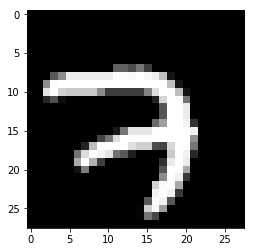

Model prediction: 2


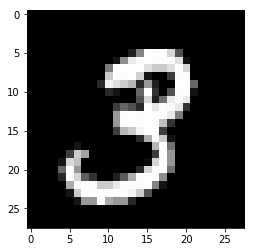

Model prediction: 3


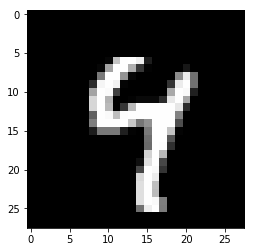

Model prediction: 9


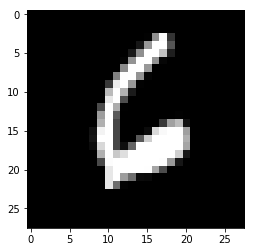

Model prediction: 6


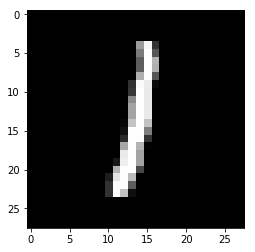

Model prediction: 1


In [13]:
predict_single_images(X_train)

In [14]:
evaluate_model(X_test, y_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-03-22-23:28:36
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Ashton\AppData\Local\Temp\tmpdgsd7y7t\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-03-22-23:28:36
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.9205, global_step = 1000, loss = 0.28430527


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Ashton\AppData\Local\Temp\tmpdgsd7y7t\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


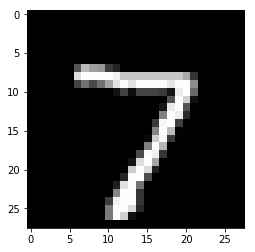

Model prediction: 7


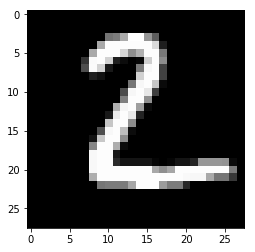

Model prediction: 2


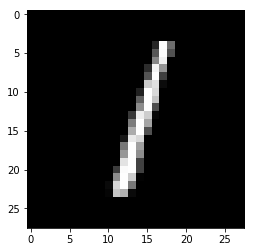

Model prediction: 1


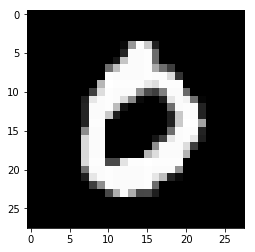

Model prediction: 0


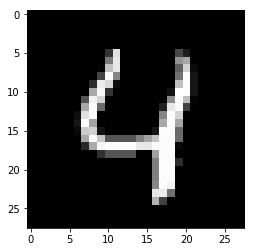

Model prediction: 4


In [15]:
predict_single_images(X_test)